In [ ]:
# Load the trained UNet model (.h5)
from tensorflow.keras.models import load_model

model = load_model('../Models/unet_comofod_complete.h5')
model.summary()

# STEP 3: Load images + masks
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

dataset_path = '/path/to/CoMoFoD_small_v2/'

def load_images(img_id):
    id_str = str(img_id).zfill(3)

    forged_path = os.path.join(dataset_path, f"{id_str}_F.png")
    mask_path = os.path.join(dataset_path, f"{id_str}_B.png")

    forged = cv2.imread(forged_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    input_img = cv2.resize(forged, (256, 256)) / 255.0
    input_tensor = np.expand_dims(input_img, axis=0)

    mask_resized = cv2.resize(mask, (256, 256))

    return forged, mask_resized, input_tensor

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[

 Total params: 485,299 (1.85 MB)

 Trainable params: 483,665 (1.85 MB)

 Non-trainable params: 1,632 (6.38 KB)

 Optimizer params: 2 (12.00 B)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📂 Processing Image ID: 038

📊 Results:
Image: 038_F.png
Before Morphology → Precision: 0.5927, Recall: 0.9812, F1-Score: 0.739, IoU: 0.586, Accuracy: 0.9768
After Morphology  → Precision: 0.8975, Recall: 0.971, F1-Score: 0.9328, IoU: 0.8741, Accuracy: 0.9953
Processing Time: 74.814 seconds


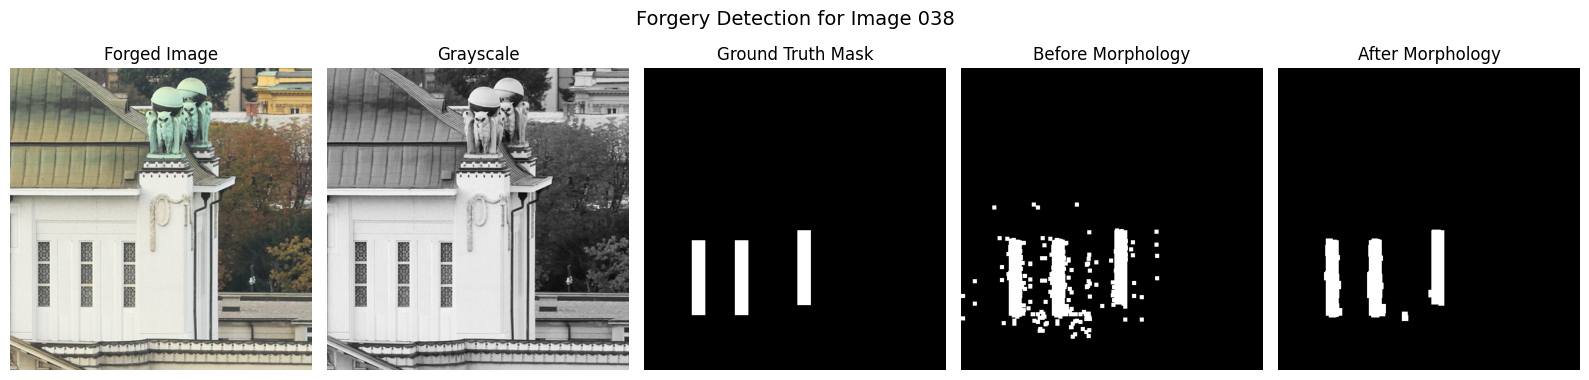

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from time import time


# Set up paths
base_path = "/path/to/CoMoFoD_small_v2/"
img_id = str(38).zfill(3)  # Process just one image

# Parameters
quantization = 16
tsimilarity = 5
tdistance = 20
vector_limit = 20
block_size = 8

print(f"\n📂 Processing Image ID: {img_id}")

start_time = time()

forged_path = os.path.join(base_path, f"{img_id}_F.png")
mask_path = os.path.join(base_path, f"{img_id}_B.png")

image = cv2.imread(forged_path)
mask = cv2.imread(mask_path)

if image is None or mask is None:
    print(f"⚠️ Skipping {img_id}: Image or Mask not found.")

mask_gray = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

arr = np.array(gray)
prediction_mask = np.zeros_like(arr, dtype=np.uint8)
row, col = arr.shape[0] - block_size, arr.shape[1] - block_size
dcts = np.empty(((row + 1) * (col + 1), 18), dtype=np.float32)

block_counter = 0
for r in range(row):
    for c in range(col):
        block = arr[r:r+block_size, c:c+block_size]
        imf = np.float32(block) / 255.0
        dct_block = cv2.dct(imf)
        dct_scaled = np.uint8(dct_block * 255.0)

        zigzag = []
        for s in range(2 * block_size - 1):
            if s % 2 == 0:
                for y in range(s, -1, -1):
                    x = s - y
                    if y < block_size and x < block_size:
                        zigzag.append(dct_scaled[y, x])
            else:
                for x in range(s, -1, -1):
                    y = s - x
                    if x < block_size and y < block_size:
                        zigzag.append(dct_scaled[y, x])

        zz = np.array(zigzag[:16], dtype=float)
        zz = np.floor(zz / quantization)
        zz = np.append(zz, [r, c])
        dcts[block_counter] = zz
        block_counter += 1

dcts = dcts[~np.all(dcts == 0, axis=1)]
dcts = dcts[np.lexsort(np.rot90(dcts))]
sim_array = []

for m in range(len(dcts) - 10):
    for n in range(m + 1, m + 10):
        dct_dist = np.linalg.norm(dcts[m][:16] - dcts[n][:16])
        spatial_dist = np.linalg.norm(dcts[m][16:] - dcts[n][16:])
        if dct_dist <= tsimilarity and spatial_dist >= tdistance:
            sim_array.append([
                dcts[m][16], dcts[m][17],
                dcts[n][16], dcts[n][17],
                dcts[m][16] - dcts[n][16],
                dcts[m][17] - dcts[n][17]
            ])

sim_array = np.array(sim_array)
delete_vec = []
for p in range(sim_array.shape[0]):
    count = np.sum(
        (sim_array[:, 4] == sim_array[p][4]) &
        (sim_array[:, 5] == sim_array[p][5])
    )
    if count < vector_limit:
        delete_vec.append(sim_array[p])
delete_vec = np.array(delete_vec)

for item in delete_vec:
    matches = np.where((sim_array == item).all(axis=1))[0]
    if matches.size == 1:
        sim_array = np.delete(sim_array, matches[0], axis=0)

for k in range(sim_array.shape[0]):
    x1, y1 = int(sim_array[k][0]), int(sim_array[k][1])
    x2, y2 = int(sim_array[k][2]), int(sim_array[k][3])
    for dx in range(7):
        for dy in range(7):
            if (x1+dx < prediction_mask.shape[0]) and (y1+dy < prediction_mask.shape[1]):
                prediction_mask[x1+dx][y1+dy] = 255
            if (x2+dx < prediction_mask.shape[0]) and (y2+dy < prediction_mask.shape[1]):
                prediction_mask[x2+dx][y2+dy] = 255

def calculate_metrics(pred_mask, true_mask):
    TP = np.sum((pred_mask == 255) & (true_mask == 255))
    FP = np.sum((pred_mask == 255) & (true_mask == 0))
    FN = np.sum((pred_mask == 0) & (true_mask == 255))
    TN = np.sum((pred_mask == 0) & (true_mask == 0))
    precision = TP / (TP + FP + 1e-6)
    recall = TP / (TP + FN + 1e-6)
    f1 = 2 * precision * recall / (precision + recall + 1e-6)
    iou = TP / (TP + FP + FN + 1e-6)
    accuracy = (TP + TN) / (TP + TN + FP + FN + 1e-6)
    return precision, recall, f1, iou, accuracy

precision_before, recall_before, f1_before, iou_before, accuracy_before = calculate_metrics(prediction_mask, mask_gray)

# Apply morphological operations with adjusted kernel and iteration
kernel = np.ones((5, 5), np.uint8)
refined_mask = cv2.morphologyEx(prediction_mask, cv2.MORPH_OPEN, kernel, iterations=2)
refined_mask = cv2.morphologyEx(refined_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

precision_after, recall_after, f1_after, iou_after, accuracy_after = calculate_metrics(refined_mask, mask_gray)

end_time = time()
processing_time = round(end_time - start_time, 3)

print("\n📊 Results:")
print(f"Image: {img_id}_F.png")
print(f"Before Morphology → Precision: {round(precision_before, 4)}, Recall: {round(recall_before, 4)}, F1-Score: {round(f1_before, 4)}, IoU: {round(iou_before, 4)}, Accuracy: {round(accuracy_before, 4)}")
print(f"After Morphology  → Precision: {round(precision_after, 4)}, Recall: {round(recall_after, 4)}, F1-Score: {round(f1_after, 4)}, IoU: {round(iou_after, 4)}, Accuracy: {round(accuracy_after, 4)}")
print(f"Processing Time: {processing_time} seconds")

plt.figure(figsize=(16, 4))
plt.suptitle(f"Forgery Detection for Image {img_id}", fontsize=14)

plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Forged Image")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(mask_gray, cmap='gray')
plt.title("Ground Truth Mask")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(prediction_mask, cmap='gray')
plt.title("Before Morphology")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(refined_mask, cmap='gray')
plt.title("After Morphology")
plt.axis("off")

plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📂 Processing Image ID: 042
Before Morphology → Precision: 0.2782, Recall: 0.6303, F1-Score: 0.386, IoU: 0.2391
After Morphology  → Precision: 0.2697, Recall: 0.6376, F1-Score: 0.379, IoU: 0.2338
Processing Time: 596.365 seconds


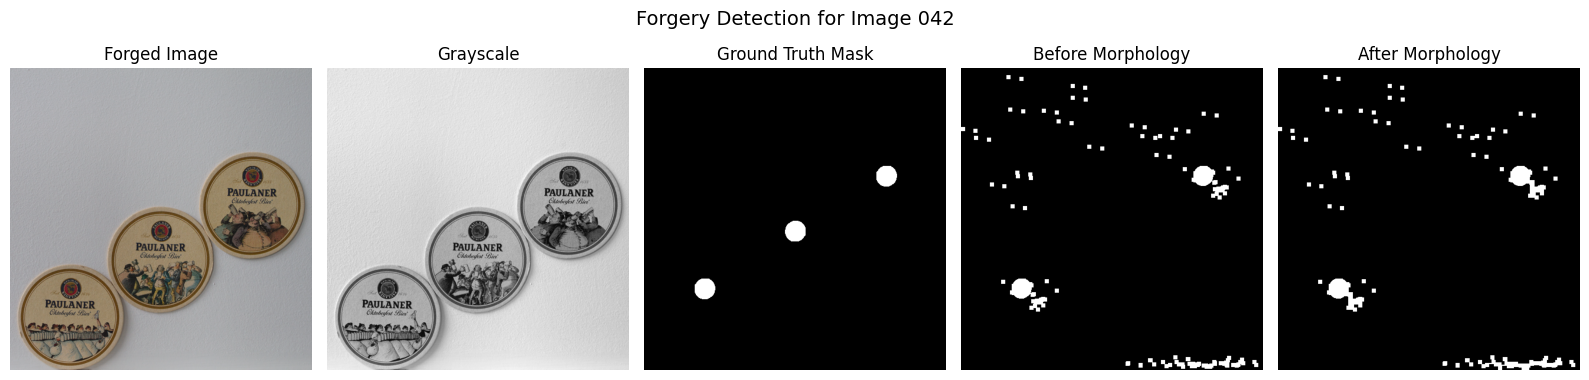


📂 Processing Image ID: 048
Before Morphology → Precision: 0.9992, Recall: 0.4708, F1-Score: 0.64, IoU: 0.4706
After Morphology  → Precision: 0.9993, Recall: 0.5124, F1-Score: 0.6774, IoU: 0.5122
Processing Time: 42.348 seconds


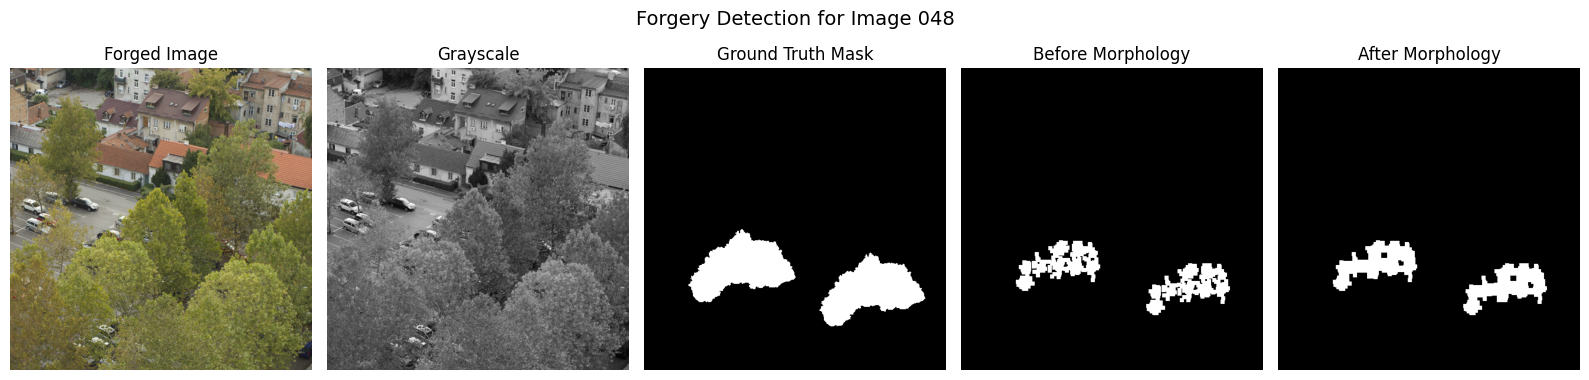


📂 Processing Image ID: 074
Before Morphology → Precision: 1.0, Recall: 0.5016, F1-Score: 0.6681, IoU: 0.5016
After Morphology  → Precision: 1.0, Recall: 0.5159, F1-Score: 0.6807, IoU: 0.5159
Processing Time: 42.324 seconds


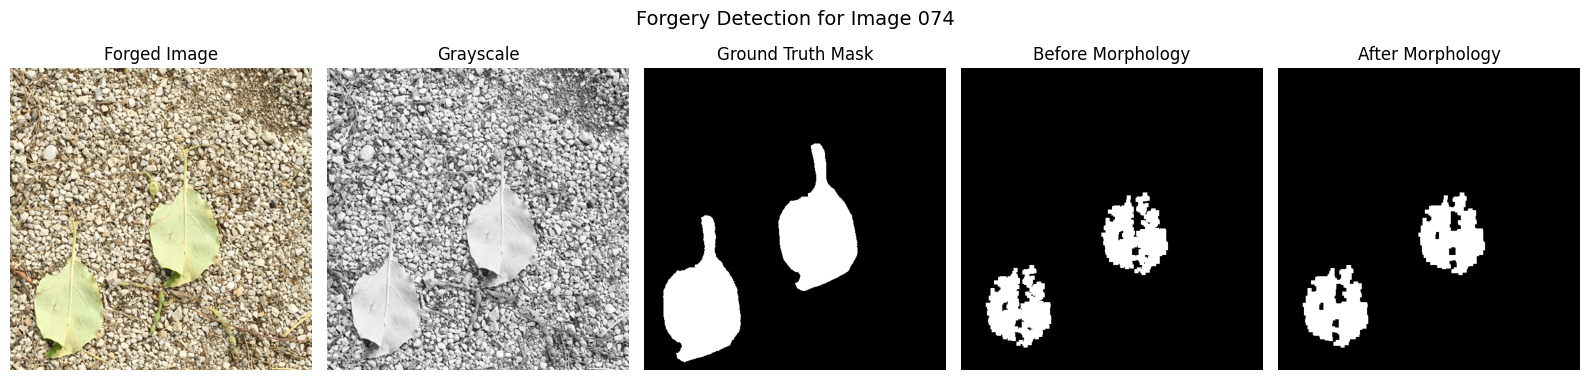

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from time import time


# Set up paths
base_path = "/path/to/CoMoFoD_small_v2/"
quantization = 16
tsimilarity = 5
tdistance = 20
vector_limit = 20
block_size = 8

# Enter image IDs in the list below
image_ids = [42,48,74]  # Example IDs

for img_id_num in image_ids:
    img_id = str(img_id_num).zfill(3)
    print(f"\n📂 Processing Image ID: {img_id}")

    start_time = time()

    forged_path = os.path.join(base_path, f"{img_id}_F.png")
    mask_path = os.path.join(base_path, f"{img_id}_B.png")

    image = cv2.imread(forged_path)
    mask = cv2.imread(mask_path)

    if image is None or mask is None:
        print(f"⚠️ Skipping {img_id}: Image or Mask not found.")
        continue

    mask_gray = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    arr = np.array(gray)
    prediction_mask = np.zeros_like(arr, dtype=np.uint8)
    row, col = arr.shape[0] - block_size, arr.shape[1] - block_size
    dcts = np.empty(((row + 1) * (col + 1), 18), dtype=np.float32)

    block_counter = 0
    for r in range(row):
        for c in range(col):
            block = arr[r:r+block_size, c:c+block_size]
            imf = np.float32(block) / 255.0
            dct_block = cv2.dct(imf)
            dct_scaled = np.uint8(dct_block * 255.0)

            zigzag = []
            for s in range(2 * block_size - 1):
                if s % 2 == 0:
                    for y in range(s, -1, -1):
                        x = s - y
                        if y < block_size and x < block_size:
                            zigzag.append(dct_scaled[y, x])
                else:
                    for x in range(s, -1, -1):
                        y = s - x
                        if x < block_size and y < block_size:
                            zigzag.append(dct_scaled[y, x])

            zz = np.array(zigzag[:16], dtype=float)
            zz = np.floor(zz / quantization)
            zz = np.append(zz, [r, c])
            dcts[block_counter] = zz
            block_counter += 1

    dcts = dcts[~np.all(dcts == 0, axis=1)]
    dcts = dcts[np.lexsort(np.rot90(dcts))]
    sim_array = []

    for m in range(len(dcts) - 10):
        for n in range(m + 1, m + 10):
            dct_dist = np.linalg.norm(dcts[m][:16] - dcts[n][:16])
            spatial_dist = np.linalg.norm(dcts[m][16:] - dcts[n][16:])
            if dct_dist <= tsimilarity and spatial_dist >= tdistance:
                sim_array.append([
                    dcts[m][16], dcts[m][17],
                    dcts[n][16], dcts[n][17],
                    dcts[m][16] - dcts[n][16],
                    dcts[m][17] - dcts[n][17]
                ])

    sim_array = np.array(sim_array)
    delete_vec = []
    for p in range(sim_array.shape[0]):
        count = np.sum(
            (sim_array[:, 4] == sim_array[p][4]) &
            (sim_array[:, 5] == sim_array[p][5])
        )
        if count < vector_limit:
            delete_vec.append(sim_array[p])
    delete_vec = np.array(delete_vec)

    for item in delete_vec:
        matches = np.where((sim_array == item).all(axis=1))[0]
        if matches.size == 1:
            sim_array = np.delete(sim_array, matches[0], axis=0)

    for k in range(sim_array.shape[0]):
        x1, y1 = int(sim_array[k][0]), int(sim_array[k][1])
        x2, y2 = int(sim_array[k][2]), int(sim_array[k][3])
        for dx in range(7):
            for dy in range(7):
                if (x1+dx < prediction_mask.shape[0]) and (y1+dy < prediction_mask.shape[1]):
                    prediction_mask[x1+dx][y1+dy] = 255
                if (x2+dx < prediction_mask.shape[0]) and (y2+dy < prediction_mask.shape[1]):
                    prediction_mask[x2+dx][y2+dy] = 255

    # Calculate metrics before morphology
    TP_before = np.sum((prediction_mask == 255) & (mask_gray == 255))
    FP_before = np.sum((prediction_mask == 255) & (mask_gray == 0))
    FN_before = np.sum((prediction_mask == 0) & (mask_gray == 255))
    TN_before = np.sum((prediction_mask == 0) & (mask_gray == 0))

    precision_before = TP_before / (TP_before + FP_before + 1e-6)
    recall_before = TP_before / (TP_before + FN_before + 1e-6)
    f1_before = 2 * precision_before * recall_before / (precision_before + recall_before + 1e-6)
    iou_before = TP_before / (TP_before + FP_before + FN_before + 1e-6)

    # Apply morphological operations
    kernel = np.ones((5, 5), np.uint8)
    refined_mask = cv2.morphologyEx(prediction_mask, cv2.MORPH_OPEN, kernel)
    refined_mask = cv2.morphologyEx(refined_mask, cv2.MORPH_CLOSE, kernel)

    # Calculate metrics after morphology
    TP_after = np.sum((refined_mask == 255) & (mask_gray == 255))
    FP_after = np.sum((refined_mask == 255) & (mask_gray == 0))
    FN_after = np.sum((refined_mask == 0) & (mask_gray == 255))
    TN_after = np.sum((refined_mask == 0) & (mask_gray == 0))

    precision_after = TP_after / (TP_after + FP_after + 1e-6)
    recall_after = TP_after / (TP_after + FN_after + 1e-6)
    f1_after = 2 * precision_after * recall_after / (precision_after + recall_after + 1e-6)
    iou_after = TP_after / (TP_after + FP_after + FN_after + 1e-6)

    end_time = time()
    processing_time = round(end_time - start_time, 3)

    # Print metrics
    print(f"Before Morphology → Precision: {round(precision_before, 4)}, Recall: {round(recall_before, 4)}, F1-Score: {round(f1_before, 4)}, IoU: {round(iou_before, 4)}")
    print(f"After Morphology  → Precision: {round(precision_after, 4)}, Recall: {round(recall_after, 4)}, F1-Score: {round(f1_after, 4)}, IoU: {round(iou_after, 4)}")
    print(f"Processing Time: {processing_time} seconds")

    # Plot results
    plt.figure(figsize=(16, 4))
    plt.suptitle(f"Forgery Detection for Image {img_id}", fontsize=14)

    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Forged Image")
    plt.axis("off")

    plt.subplot(1, 5, 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale")
    plt.axis("off")

    plt.subplot(1, 5, 3)
    plt.imshow(mask_gray, cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis("off")

    plt.subplot(1, 5, 4)
    plt.imshow(prediction_mask, cmap='gray')
    plt.title("Before Morphology")
    plt.axis("off")

    plt.subplot(1, 5, 5)
    plt.imshow(refined_mask, cmap='gray')
    plt.title("After Morphology")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step

📊 Results for Image: 003_F.png
Before Morphology → Precision: 0.9025, Recall: 0.9312, F1-Score: 0.9166, IoU: 0.8461, Accuracy: 0.9971
After Morphology  → Precision: 1.0, Recall: 0.9248, F1-Score: 0.9609, IoU: 0.9248, Accuracy: 0.9987
Processing Time: 0.3549 seconds


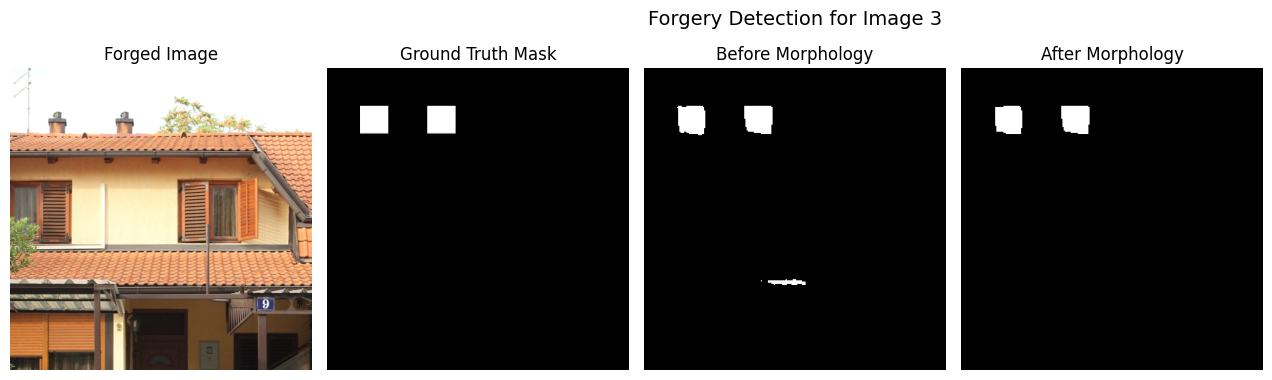

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step

📊 Results for Image: 023_F.png
Before Morphology → Precision: 0.9915, Recall: 0.9948, F1-Score: 0.9931, IoU: 0.9863, Accuracy: 0.9997
After Morphology  → Precision: 0.996, Recall: 0.8092, F1-Score: 0.8929, IoU: 0.8065, Accuracy: 0.9955
Processing Time: 0.3822 seconds


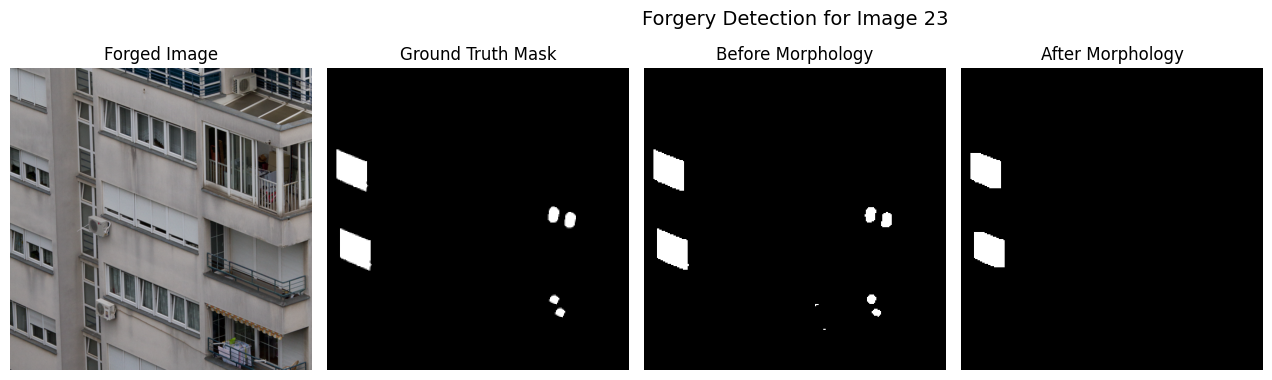

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step

📊 Results for Image: 079_F.png
Before Morphology → Precision: 0.9916, Recall: 0.9986, F1-Score: 0.9951, IoU: 0.9902, Accuracy: 0.9998
After Morphology  → Precision: 1.0, Recall: 0.9986, F1-Score: 0.9993, IoU: 0.9986, Accuracy: 1.0
Processing Time: 0.3668 seconds


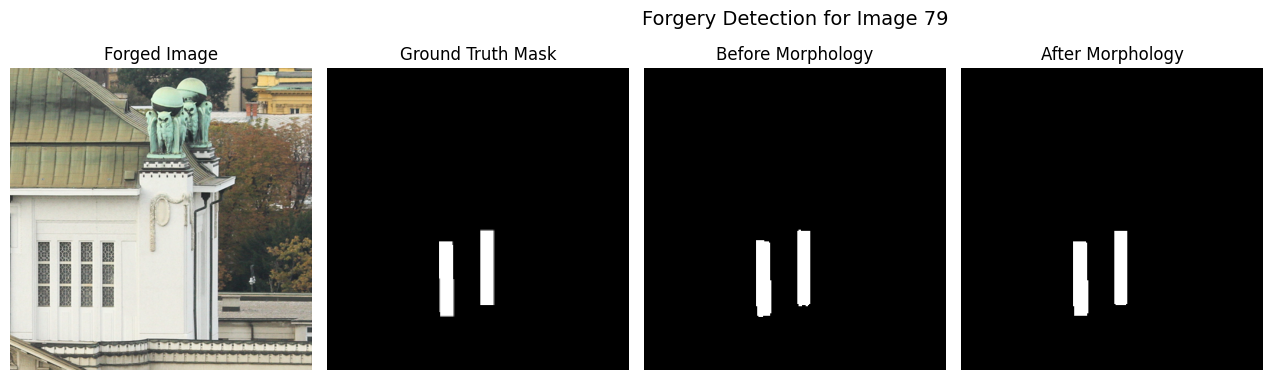

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

📊 Results for Image: 030_F.png
Before Morphology → Precision: 0.9871, Recall: 0.9986, F1-Score: 0.9928, IoU: 0.9858, Accuracy: 0.9992
After Morphology  → Precision: 0.9791, Recall: 0.9997, F1-Score: 0.9893, IoU: 0.9788, Accuracy: 0.9988
Processing Time: 0.3617 seconds


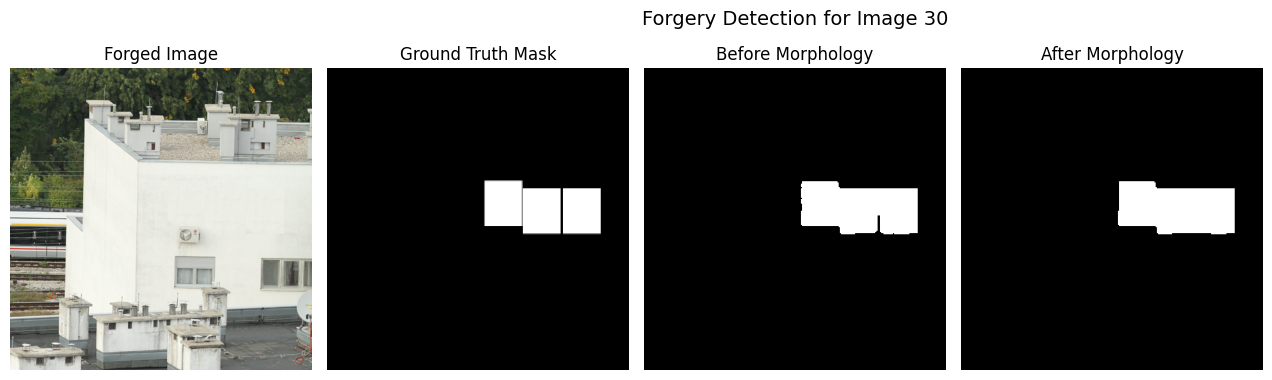

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

📊 Results for Image: 120_F.png
Before Morphology → Precision: 0.9959, Recall: 0.9337, F1-Score: 0.9638, IoU: 0.9301, Accuracy: 0.9905
After Morphology  → Precision: 0.9899, Recall: 0.9082, F1-Score: 0.9472, IoU: 0.8998, Accuracy: 0.9863
Processing Time: 0.3664 seconds


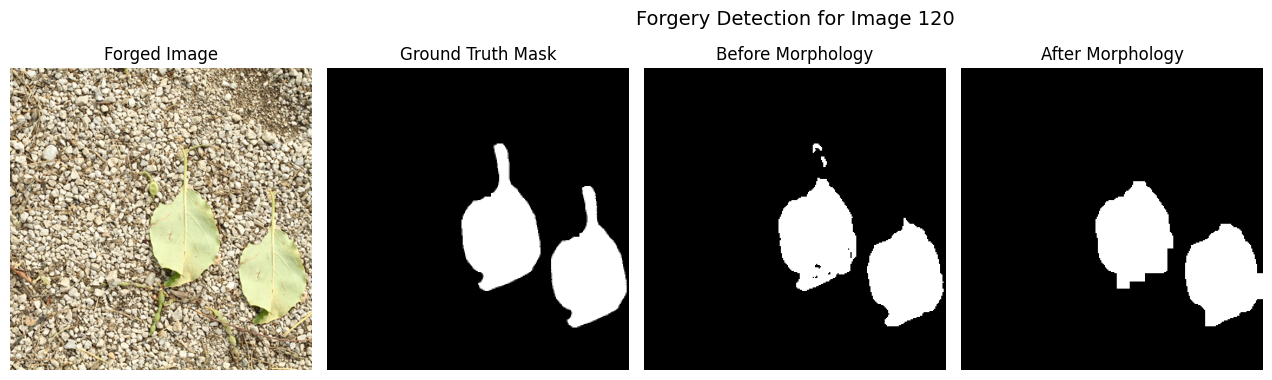

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

📊 Results for Image: 166_F.png
Before Morphology → Precision: 0.9163, Recall: 0.9917, F1-Score: 0.9525, IoU: 0.9093, Accuracy: 0.9984
After Morphology  → Precision: 0.9924, Recall: 0.9603, F1-Score: 0.976, IoU: 0.9532, Accuracy: 0.9992
Processing Time: 0.3726 seconds


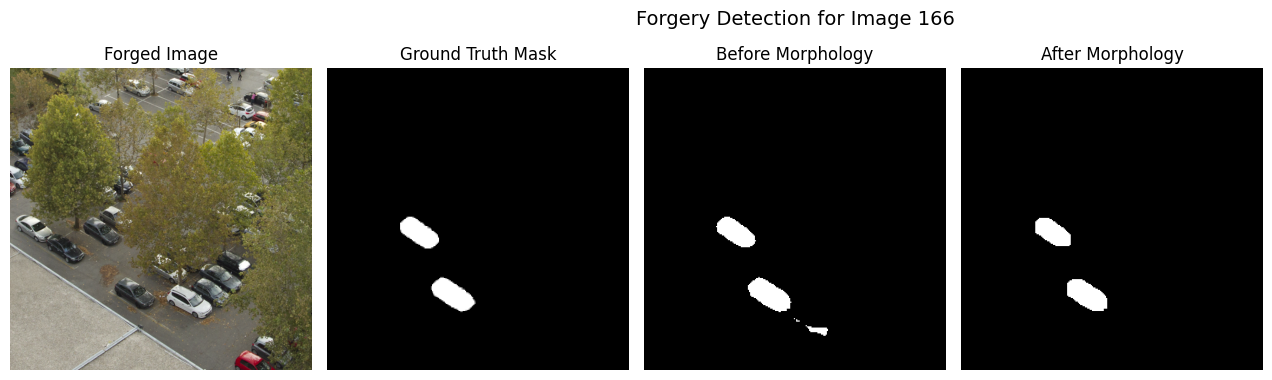


✅ All Results Summary:


,Image Name,Precision Before,Recall Before,F1-Score Before,IoU Before,Accuracy Before,Precision After,Recall After,F1-Score After,IoU After,Accuracy After,ProcessingTime,TP Before,FP Before,FN Before,TN Before,TP After,FP After,FN After,TN After
0,003_F.png,0.9025,0.9312,0.9166,0.8461,0.9971,1.0000,0.9248,0.9609,0.9248,0.9987,0.3549,1028,111,76,64273,1021,0,83,64384
1,023_F.png,0.9915,0.9948,0.9931,0.9863,0.9997,0.9960,0.8092,0.8929,0.8065,0.9955,0.3822,1517,13,8,63826,1234,5,291,63834
2,079_F.png,0.9916,0.9986,0.9951,0.9902,0.9998,1.0000,0.9986,0.9993,0.9986,1.0000,0.3668,1412,12,2,63960,1412,0,2,63972
3,030_F.png,0.9871,0.9986,0.9928,0.9858,0.9992,0.9791,0.9997,0.9893,0.9788,0.9988,0.3617,3605,47,5,61706,3609,77,1,61676
4,120_F.png,0.9959,0.9337,0.9638,0.9301,0.9905,0.9899,0.9082,0.9472,0.8998,0.9863,0.3664,8224,34,584,56307,7999,82,809,56259
5,166_F.png,0.9163,0.9917,0.9525,0.9093,0.9984,0.9924,0.9603,0.9760,0.9532,0.9992,0.3726,1073,98,9,64236,1039,8,43,64326


In [ ]:
import time
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Define paths and model
dataset_path = "/path/to/CoMoFoD_small_v2/"
# Assume `model` is already loaded

# Define image IDs to process
image_ids = [3,166,23,79,30,120]  # Enter your required IDs here

def calculate_metrics(pred_mask, true_mask):
    TP = np.sum((pred_mask == 255) & (true_mask == 255))
    FP = np.sum((pred_mask == 255) & (true_mask == 0))
    FN = np.sum((pred_mask == 0) & (true_mask == 255))
    TN = np.sum((pred_mask == 0) & (true_mask == 0))
    precision = TP / (TP + FP + 1e-6)
    recall = TP / (TP + FN + 1e-6)
    f1 = 2 * precision * recall / (precision + recall + 1e-6)
    iou = TP / (TP + FP + FN + 1e-6)
    accuracy = (TP + TN) / (TP + TN + FP + FN + 1e-6)
    return precision, recall, f1, iou, accuracy, TP, FP, FN, TN

results = []

for img_id in image_ids:
    id_str = str(img_id).zfill(3)
    image_name = f"{id_str}_F.png"
    mask_name = f"{id_str}_B.png"

    forged_path = os.path.join(dataset_path, image_name)
    mask_path = os.path.join(dataset_path, mask_name)

    forged = cv2.imread(forged_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if forged is None or mask is None:
        print(f"⚠️ Skipping {image_name} — missing file(s)")
        continue

    input_img = cv2.resize(forged, (256, 256)) / 255.0
    input_tensor = np.expand_dims(input_img, axis=0)
    mask_resized = cv2.resize(mask, (256, 256))

    start_time = time.time()
    pred = model.predict(input_tensor)[0, :, :, 0]
    elapsed = time.time() - start_time

    pred_mask = (pred > 0.5).astype(np.uint8) * 255

    precision_before, recall_before, f1_before, iou_before, accuracy_before, TP_before, FP_before, FN_before, TN_before = calculate_metrics(pred_mask, mask_resized)

    # Apply morphology
    kernel = np.ones((5, 5), np.uint8)
    refined_mask = cv2.morphologyEx(pred_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    refined_mask = cv2.morphologyEx(refined_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    precision_after, recall_after, f1_after, iou_after, accuracy_after, TP_after, FP_after, FN_after, TN_after = calculate_metrics(refined_mask, mask_resized)

    print(f"\n📊 Results for Image: {image_name}")
    print(f"Before Morphology → Precision: {round(precision_before, 4)}, Recall: {round(recall_before, 4)}, F1-Score: {round(f1_before, 4)}, IoU: {round(iou_before, 4)}, Accuracy: {round(accuracy_before, 4)}")
    print(f"After Morphology  → Precision: {round(precision_after, 4)}, Recall: {round(recall_after, 4)}, F1-Score: {round(f1_after, 4)}, IoU: {round(iou_after, 4)}, Accuracy: {round(accuracy_after, 4)}")
    print(f"Processing Time: {round(elapsed, 4)} seconds")

    plt.figure(figsize=(16, 4))
    plt.suptitle(f"Forgery Detection for Image {img_id}", fontsize=14)

    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(forged, cv2.COLOR_BGR2RGB))
    plt.title("Forged Image")
    plt.axis("off")

    plt.subplot(1, 5, 2)
    plt.imshow(mask_resized, cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis("off")

    plt.subplot(1, 5, 3)
    plt.imshow(pred_mask, cmap='gray')
    plt.title("Before Morphology")
    plt.axis("off")

    plt.subplot(1, 5, 4)
    plt.imshow(refined_mask, cmap='gray')
    plt.title("After Morphology")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    results.append({
        "Image Name": image_name,
        "Precision Before": round(precision_before, 4),
        "Recall Before": round(recall_before, 4),
        "F1-Score Before": round(f1_before, 4),
        "IoU Before": round(iou_before, 4),
        "Accuracy Before": round(accuracy_before, 4),
        "Precision After": round(precision_after, 4),
        "Recall After": round(recall_after, 4),
        "F1-Score After": round(f1_after, 4),
        "IoU After": round(iou_after, 4),
        "Accuracy After": round(accuracy_after, 4),
        "ProcessingTime": round(elapsed, 4),
        "TP Before": TP_before,
        "FP Before": FP_before,
        "FN Before": FN_before,
        "TN Before": TN_before,
        "TP After": TP_after,
        "FP After": FP_after,
        "FN After": FN_after,
        "TN After": TN_after
    })

# Convert results to DataFrame
df = pd.DataFrame(results)
print("\n✅ All Results Summary:")
display(df)